In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 1
%aimport linear_models

np.set_printoptions(suppress=True)

np.set_printoptions(precision=3)

data = pd.read_csv("../../Datasets/Spambase/spambase.data", header=None).dropna()
y = data.pop(57).values.astype(int)
X = data.values.astype('float32')
X = normalize(X, norm='l2', axis=0)
np.unique(y, return_counts=True), len(y)

((array([0, 1]), array([2788, 1813])), 4601)

In [2]:
from data_gen import *
from self_learning import msla
from sklearn.metrics import accuracy_score

err_SLA = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X[id_l,], y[id_l], X[id_u,], random_state=2020)
    err_SLA.append(accuracy_score(y[id_test], H0.predict(X[id_test,])))
print(np.mean(err_SLA), np.std(err_SLA))

0.5819618169848584 0.06204892753543813


In [20]:
from sklearn.semi_supervised import LabelPropagation
from data_gen import *
from sklearn.metrics import accuracy_score

err_prop = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    X_train = np.concatenate((X[id_l,], X[id_u,]))
    y_train = np.concatenate((y[id_l,], -1*np.ones(len(id_u), dtype=int)))
    model = LabelPropagation(n_jobs=-1)
    model.fit(X_train, y_train)
    err_prop.append(accuracy_score(y[id_test], model.predict(X[id_test,])))
print(np.mean(err_prop), np.std(err_prop))

0.5907504937458854 0.048292408685377146


In [2]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

scr_all = []
scr_50 = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_all = np.concatenate((id_l, id_u))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LTF_all = Halfspace()
    LTF_all.fit(X[id_all,], y[id_all])
    scr_all.append(LTF_all.score(X[id_test,], y[id_test]))
    LTF_50 = Halfspace()
    LTF_50.fit(X[id_l,], y[id_l])
    scr_50.append(LTF_50.score(X[id_test,], y[id_test]))
    
print('50 labeled data : ', np.mean(scr_50), np.std(scr_50))
print('all labeled data : ', np.mean(scr_all), np.std(scr_all))

50 labeled data :  0.7403554970375247 0.05413496777238866
all labeled data :  0.8951612903225806 0.008208994535174286


In [ ]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

scr_all = []
scr_50 = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_all = np.concatenate((id_l, id_u))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LTF_all = Halfspace()
    LTF_all.fit(X[id_all,], y[id_all])
    scr_all.append(LTF_all.score(X[id_test,], y[id_test]))
    LTF_50 = Halfspace()
    LTF_50.fit(X[id_l,], y[id_l])
    scr_50.append(LTF_50.score(X[id_test,], y[id_test]))
    
print('50 labeled data : ', np.mean(scr_50), np.std(scr_50))
print('all labeled data : ', np.mean(scr_all), np.std(scr_all))

In [2]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_all = np.concatenate((id_l, id_u))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = Halfspaces(epochs=1000, leakage=.1, thresh='rand')
    LK.fit(X[id_all,], y[id_all])
    print(LK.score(X[id_test,], y[id_test]))

0.8959842001316656
0.8926925608953259
0.8959842001316656
0.8992758393680053
0.9065174456879526
0.9150757077024358
0.9104674127715603
0.9052007899934167
0.9038841342988808
0.9038841342988808
0.8992758393680053
0.8973008558262014
0.9091507570770243
0.8946675444371297
0.901909150757077
0.9032258064516129
0.8953258722843976
0.9104674127715603
0.8973008558262014
0.9045424621461488


In [14]:
stats = [0.8959842001316656, 0.8926925608953259, 0.8959842001316656, 0.8992758393680053, 0.9065174456879526, 0.9150757077024358, 0.9104674127715603, 0.9052007899934167, 0.9038841342988808, 0.9038841342988808, 0.8992758393680053, 0.8973008558262014, 0.9091507570770243, 0.8946675444371297, 0.901909150757077, 0.9032258064516129, 0.8953258722843976, 0.9104674127715603, 0.8973008558262014, 0.9045424621461488]
len(stats), np.mean(stats), np.std(stats)

(20, 0.9021066491112576, 0.006030441192576623)

In [12]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=5000, verbose=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    0.978 0.98 ]
Pseudo labeled data  (array([0, 1]), array([262, 786]))
|Xl|= 1098 , |Xu|= 1984 , pseudo-labeled set (size, accuracy) : 1048 0.8797709923664122
training set (accuracy, ratio) :  0.8852459016393442 (array([0, 1]), array([286, 812]))
step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.998 0.997 0.997 0.997]
Pseudo labeled data  (array([0, 1]), array([169,  49]))
|Xl|= 1316 , |Xu|= 1766 , pseudo-labeled set (size, accuracy) : 218 0.9908256880733946
training set (accuracy, ratio) :  0.9027355623100304 (array([0, 1]), array([455, 861]))
step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    0.999 0.997 0.997]
Pseudo labeled data  (array([0, 1]), array([49, 59]))
|Xl|= 1424 , |Xu|= 1658 , pseudo-labeled set (size, accuracy

KeyboardInterrupt: 

In [ ]:
from data_gen import *
from linear_models import *

S = []
for leak in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:
    for rt in [.2, .001]:
        for ep in [1, 5]:
            L = []
            S = []
            for i in range(20):
                id_l = Datasets.load_obj('SPAM_l_'+str(i))
                id_u = Datasets.load_obj('SPAM_u_'+str(i))
                id_all = np.concatenate((id_l, id_u))
                id_test = Datasets.load_obj('SPAM_test_'+str(i))
                hlf = Halfspace(epochs=ep, leakage=leak, learning_rate=rt)
                hlf.fit(X[id_all,], y[id_all])
                S.append(hlf.score(X[id_test,], y[id_test]))
            print('leakage : ', leak, 'learning_rate : ', rt, ' epochs : ', ep, np.mean(S))

leakage :  0.1 learning_rate :  0.2  epochs :  1 0.5453587886767611
leakage :  0.1 learning_rate :  0.2  epochs :  5 0.5884463462804477
leakage :  0.1 learning_rate :  0.001  epochs :  1 0.5453587886767611
leakage :  0.1 learning_rate :  0.001  epochs :  5 0.5884463462804477
leakage :  0.2 learning_rate :  0.2  epochs :  1 0.5567807768268597
leakage :  0.2 learning_rate :  0.2  epochs :  5 0.5943054641211323
leakage :  0.2 learning_rate :  0.001  epochs :  1 0.5567807768268597
leakage :  0.2 learning_rate :  0.001  epochs :  5 0.5943054641211323
leakage :  0.3 learning_rate :  0.2  epochs :  1 0.5677419354838709
leakage :  0.3 learning_rate :  0.2  epochs :  5 0.5947004608294931
leakage :  0.3 learning_rate :  0.001  epochs :  1 0.5677419354838709
leakage :  0.3 learning_rate :  0.001  epochs :  5 0.5947004608294931
leakage :  0.4 learning_rate :  0.2  epochs :  1 0.5868005266622778
leakage :  0.4 learning_rate :  0.2  epochs :  5 0.5975641869651086
leakage :  0.4 learning_rate :  0.00

In [11]:
from data_gen import *
from linear_models import *

S = []
for leak in [.01, .1, .2, .3, .4, .5, .6, .7, .8, .9]:
    for rt in [.2, .1, .01, .001]:
        for ep in [1, 2, 3, 4, 5]:
            L = []
            S = []
            for i in range(20):
                id_l = Datasets.load_obj('SPAM_l_'+str(i))
                id_u = Datasets.load_obj('SPAM_u_'+str(i))
                id_all = np.concatenate((id_l, id_u))
                id_test = Datasets.load_obj('SPAM_test_'+str(i))
                hlf = Halfspace(epochs=ep, leakage=leak, learning_rate=rt)
                hlf.fit(X[id_all,], y[id_all])
                S.append(hlf.score(X[id_test,], y[id_test]))
            print('leakage : ', leak, 'learning_rate : ', rt, ' epochs : ', ep, np.mean(S))

leakage :  0.01 learning_rate :  0.2  epochs :  1 0.5527649769585254
leakage :  0.01 learning_rate :  0.2  epochs :  2 0.5611915734035551
leakage :  0.01 learning_rate :  0.2  epochs :  3 0.5684002633311389
leakage :  0.01 learning_rate :  0.2  epochs :  4 0.5728768926925609
leakage :  0.01 learning_rate :  0.2  epochs :  5 0.5837722185648453
leakage :  0.01 learning_rate :  0.1  epochs :  1 0.5527649769585254
leakage :  0.01 learning_rate :  0.1  epochs :  2 0.5611915734035551
leakage :  0.01 learning_rate :  0.1  epochs :  3 0.5684002633311389
leakage :  0.01 learning_rate :  0.1  epochs :  4 0.5728768926925609
leakage :  0.01 learning_rate :  0.1  epochs :  5 0.5837722185648453
leakage :  0.01 learning_rate :  0.01  epochs :  1 0.5527649769585254
leakage :  0.01 learning_rate :  0.01  epochs :  2 0.5611915734035551
leakage :  0.01 learning_rate :  0.01  epochs :  3 0.5684002633311389
leakage :  0.01 learning_rate :  0.01  epochs :  4 0.5728768926925609


KeyboardInterrupt: 

In [8]:
from data_gen import *
from linear_models import *

S = []
for leak in [.01, .1, .2, .3]:
    for rt in [.2, .1, .01, .001]:
        for ep in [1, 2, 3, 4, 5]:
            L = []
            S = []
            for i in range(20):
                id_l = Datasets.load_obj('SPAM_l_'+str(i))
                id_u = Datasets.load_obj('SPAM_u_'+str(i))
                id_test = Datasets.load_obj('SPAM_test_'+str(i))
                hlf = Halfspace(epochs=ep, leakage=leak, learning_rate=rt)
                hlf.fit(X[id_l,], y[id_l])
                S.append(hlf.score(X[id_test,], y[id_test]))
            print('leakage : ', leak, 'learning_rate : ', rt, ' epochs : ', ep, np.mean(S))

leakage :  0.01 learning_rate :  0.2  epochs :  1 0.5151086240947992
leakage :  0.01 learning_rate :  0.2  epochs :  2 0.5073403554970375
leakage :  0.01 learning_rate :  0.2  epochs :  3 0.4882159315339039
leakage :  0.01 learning_rate :  0.2  epochs :  4 0.4858459512837393
leakage :  0.01 learning_rate :  0.2  epochs :  5 0.4932521395655036
leakage :  0.01 learning_rate :  0.1  epochs :  1 0.5151086240947992
leakage :  0.01 learning_rate :  0.1  epochs :  2 0.5073403554970375
leakage :  0.01 learning_rate :  0.1  epochs :  3 0.4882159315339039
leakage :  0.01 learning_rate :  0.1  epochs :  4 0.4858459512837393
leakage :  0.01 learning_rate :  0.1  epochs :  5 0.4932521395655036
leakage :  0.01 learning_rate :  0.01  epochs :  1 0.5151086240947992
leakage :  0.01 learning_rate :  0.01  epochs :  2 0.5073403554970375
leakage :  0.01 learning_rate :  0.01  epochs :  3 0.4882159315339039
leakage :  0.01 learning_rate :  0.01  epochs :  4 0.4858459512837393
leakage :  0.01 learning_rate 

In [9]:
from data_gen import *
from linear_models import *

S = []
for leak in [.4, .5]:
    for rt in [.1]:
        for ep in [1, 2, 3, 4, 5]:
            L = []
            S = []
            for i in range(20):
                id_l = Datasets.load_obj('SPAM_l_'+str(i))
                id_u = Datasets.load_obj('SPAM_u_'+str(i))
                id_test = Datasets.load_obj('SPAM_test_'+str(i))
                hlf = Halfspace(epochs=ep, leakage=leak, learning_rate=rt)
                hlf.fit(X[id_l,], y[id_l])
                S.append(hlf.score(X[id_test,], y[id_test]))
            print('leakage : ', leak, 'learning_rate : ', rt, ' epochs : ', ep, np.mean(S))

leakage :  0.4 learning_rate :  0.1  epochs :  1 0.5442067149440422
leakage :  0.4 learning_rate :  0.1  epochs :  2 0.5486175115207373
leakage :  0.4 learning_rate :  0.1  epochs :  3 0.5529295589203425
leakage :  0.4 learning_rate :  0.1  epochs :  4 0.5480579328505597
leakage :  0.4 learning_rate :  0.1  epochs :  5 0.5415075707702436
leakage :  0.5 learning_rate :  0.1  epochs :  1 0.5537524687294273
leakage :  0.5 learning_rate :  0.1  epochs :  2 0.5580974325213957
leakage :  0.5 learning_rate :  0.1  epochs :  3 0.5641869651086241
leakage :  0.5 learning_rate :  0.1  epochs :  4 0.5654048716260698
leakage :  0.5 learning_rate :  0.1  epochs :  5 0.5608953258722844


In [10]:
from data_gen import *
from linear_models import *

S = []
for leak in [.6, .7, .8, .9]:
    for rt in [.1]:
        for ep in [1, 2, 3, 4, 5]:
            L = []
            S = []
            for i in range(20):
                id_l = Datasets.load_obj('SPAM_l_'+str(i))
                id_u = Datasets.load_obj('SPAM_u_'+str(i))
                id_test = Datasets.load_obj('SPAM_test_'+str(i))
                hlf = Halfspace(epochs=ep, leakage=leak, learning_rate=rt)
                hlf.fit(X[id_l,], y[id_l])
                S.append(hlf.score(X[id_test,], y[id_test]))
            print('leakage : ', leak, 'learning_rate : ', rt, ' epochs : ', ep, np.mean(S))

leakage :  0.6 learning_rate :  0.1  epochs :  1 0.5560236998025017
leakage :  0.6 learning_rate :  0.1  epochs :  2 0.5554641211323238
leakage :  0.6 learning_rate :  0.1  epochs :  3 0.5626069782751809
leakage :  0.6 learning_rate :  0.1  epochs :  4 0.5638248847926268
leakage :  0.6 learning_rate :  0.1  epochs :  5 0.5633969716919024
leakage :  0.7 learning_rate :  0.1  epochs :  1 0.5697169190256748
leakage :  0.7 learning_rate :  0.1  epochs :  2 0.5773206056616195
leakage :  0.7 learning_rate :  0.1  epochs :  3 0.5700131665569453
leakage :  0.7 learning_rate :  0.1  epochs :  4 0.5640882159315338
leakage :  0.7 learning_rate :  0.1  epochs :  5 0.5609611586570111
leakage :  0.8 learning_rate :  0.1  epochs :  1 0.5433179723502305
leakage :  0.8 learning_rate :  0.1  epochs :  2 0.5545424621461488
leakage :  0.8 learning_rate :  0.1  epochs :  3 0.5482883475971033
leakage :  0.8 learning_rate :  0.1  epochs :  4 0.5467083607636604
leakage :  0.8 learning_rate :  0.1  epochs :  5

# Labeled data provided by SLA*

In [3]:
from self_learning import msla
from data_gen import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    H0, Xl, yl, Xu, yu, thetas, _ = msla(x_l=X[id_l,], y_l=y[id_l], x_u=X[id_u,], y_tl=y[id_l], y_u=y[id_u], random_state=2020)

size of Labeled data :  3082  accuracy :  0.8961713173264114
size of Labeled data :  3082  accuracy :  0.9094743672939649
size of Labeled data :  3082  accuracy :  0.8533419857235561
size of Labeled data :  3082  accuracy :  0.8968202465931213
size of Labeled data :  3082  accuracy :  0.8679428942245295
size of Labeled data :  3082  accuracy :  0.8598312783906554
size of Labeled data :  3082  accuracy :  0.900064892926671
size of Labeled data :  3082  accuracy :  0.8718364698247891
size of Labeled data :  3082  accuracy :  0.8737832576249189
size of Labeled data :  3082  accuracy :  0.9136924075275795
size of Labeled data :  3082  accuracy :  0.8335496430889033
size of Labeled data :  3082  accuracy :  0.8990914990266061
size of Labeled data :  3082  accuracy :  0.8526930564568462
size of Labeled data :  3082  accuracy :  0.8569110966904607
size of Labeled data :  3082  accuracy :  0.8780012978585334
size of Labeled data :  3082  accuracy :  0.8737832576249189
size of Labeled data :  3

In [3]:
from sklearn.svm import LinearSVC
from self_learning import msla
from linear_models import *
from data_gen import *
from sklearn.metrics import accuracy_score

err_SVM = []
err_HS = []
err_SLA = []
pl_SVM = []
pl_HS = []
pl_LK = []
all_SVM = []
all_HS = []
all_LK = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    
    ### Training on labeled data only
    ## SVM
    clf = LinearSVC(random_state=2020)
    clf.fit(X[id_l,], y[id_l])
    err_SVM.append(clf.score(X[id_test,], y[id_test]))
    
    ## Halfspace LTF
    hlf = Halfspace(epochs=1)
    hlf.fit(X[id_l,], y[id_l])
    err_HS.append(hlf.score(X[id_test,], y[id_test]))
    
    ## SLA*
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X[id_l,], y[id_l], X[id_u,], random_state=2020)
    err_SLA.append(accuracy_score(y[id_test], H0.predict(X[id_test,])))
    
    ### Training on labeled + pseudo labeled from SLA*
    ## SVM
    clf = LinearSVC(random_state=2020)
    clf.fit(Xl, yl)
    pl_SVM.append(clf.score(X[id_test,], y[id_test]))
    
    ## Halfspace LTF
    hlf = Halfspace(epochs=1)
    hlf.fit(Xl, yl)
    pl_HS.append(hlf.score(X[id_test,], y[id_test]))
    
    ## Halfspaces 
    LK = Halfspaces(epochs=1, frac=20)
    LK.fit(Xl, yl)
    pl_LK.append(LK.score(X[id_test,], y[id_test]))
    
    ### Training on labeled + unlabled data
    id_all = np.concatenate((id_l, id_u))
    
    ## SVM
    clf = LinearSVC(random_state=2020)
    clf.fit(X[id_all,], y[id_all])
    all_SVM.append(clf.score(X[id_test,], y[id_test]))

    ## Halfspace LTF
    hlf = Halfspace(epochs=1)
    hlf.fit(X[id_all,], y[id_all])
    all_HS.append(hlf.score(X[id_test,], y[id_test]))
    
    ## Halfspaces 
    LK = Halfspaces(epochs=1, frac=20)
    LK.fit(X[id_all,], y[id_all])
    all_LK.append(LK.score(X[id_test,], y[id_test]))
    
print('=== Training on labeled data only ===')
print('SVM : ', np.mean(err_SVM), np.std(err_SVM))
print('Halfspace : ', np.mean(err_HS), np.std(err_HS))
print('SLA* : ', np.mean(err_SLA), np.std(err_SLA))

print('=== Training on labeled + pseudo labeled data from LSA* data ===')
print('SVM : ', np.mean(pl_SVM), np.std(pl_SVM))
print('Halfspace : ', np.mean(pl_HS), np.std(pl_HS))
print('Halfspaces LK : ', np.mean(pl_LK), np.std(pl_LK))

print('=== Training on all data ===')
print('SVM : ', np.mean(all_SVM), np.std(all_SVM))
print('Halfspace : ', np.mean(all_HS), np.std(all_HS))
print('Halfspaces LK : ', np.mean(all_LK), np.std(all_LK))

=== Training on labeled data only ===
SVM :  0.6283080974325214 0.044082116368001155
Halfspace :  0.5414417379855168 0.08019543152829305
SLA* :  0.8730743910467412 0.026833300922639265
=== Training on labeled + pseudo labeled data from LSA* data ===
SVM :  0.8269585253456221 0.044558766057872234
Halfspace :  0.576695194206715 0.029175141285267072
Halfspaces LK :  0.8735681369321922 0.026322804927467476
=== Training on all data ===
SVM :  0.882258064516129 0.008734388127837797
Halfspace :  0.5677419354838709 0.01964797079102654
Halfspaces LK :  0.9156682027649768 0.007557592217500986


In [ ]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
      
    ### Training on labeled + unlabled data
    id_all = np.concatenate((id_l, id_u))
      
    ## Halfspaces 
    LK = Halfspaces(epochs=1, frac=20, leakage=.3, thresh='rand', learning_rate=.1)
    LK.fit(X[id_all,], y[id_all])
    print(LK.score(X[id_test,], y[id_test]))

In [ ]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
      
    ### Training on labeled + unlabled data
    id_all = np.concatenate((id_l, id_u))
      
    ## Halfspaces 
    LK = Halfspaces(epochs=1, frac=20, leakage=.3, thresh='rand', learning_rate=.1)
    LK.fit(X[id_all,], y[id_all])
    print(LK.score(X[id_test,], y[id_test]))

0.9203423304805793


In [2]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
      
    ### Training on labeled + unlabled data
    id_all = np.concatenate((id_l, id_u))
      
    ## Halfspaces 
    LK = Halfspaces(epochs=1, frac=20, leakage=.3, thresh='max', learning_rate=.1)
    LK.fit(X[id_all,], y[id_all])
    print(LK.score(X[id_test,], y[id_test]))

0.9078341013824884


In [2]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla, fsla
from linear_models import *
from sklearn.metrics import accuracy_score

err_SVM = []
err_HS = []
err_MSLA = []
err_FSLA = []
pl_SVM = []
pl_HS = []
pl_LK = []
for i in range(20):
    print('-- Split ', i, ' --')
    X, y = shuffle(X, y, random_state=2020)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    X_l, X_u, y_l, y_u = train_test_split(X_train, y_train, train_size=50, random_state=2020)
    
    ## SVM
    clf = LinearSVC(random_state=2020)
    clf.fit(X_l, y_l)
    err_SVM.append(clf.score(X_test, y_test))
    
    ## Halfspace LTF
    hlf = Halfspace(epochs=1)
    hlf.fit(X_l, y_l)
    err_HS.append(hlf.score(X_test, y_test))
    
    ## SLA
    H1, _, _, _ = fsla(X_l, y_l, X_u, theta=0.7, max_iter=100, random_state=2020)
    err_FSLA.append(accuracy_score(y_test, H1.predict(X_test)))
    
    ## SLA*
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X_l, y_l, X_u, random_state=2020)
    err_MSLA.append(accuracy_score(y_test, H0.predict(X_test)))
    
    ## SVM on labeled + pseudo labeled data 
    clf = LinearSVC(random_state=2020)
    clf.fit(Xl, yl)
    pl_SVM.append(clf.score(X_test, y_test))
    
    ## Halfspace LTF on labeled + pseudo labeled data 
    hlf = Halfspace(epochs=1)
    hlf.fit(Xl, yl)
    pl_HS.append(hlf.score(X_test, y_test))
    
    LK = Halfspaces(epochs=1, frac=20)
    LK.fit(Xl, yl)
    pl_LK.append(LK.score(X_test, y_test))
    
print('=== Training on labeled data only ===')
print('SVM : ', np.mean(err_SVM), np.std(err_SVM))
print('Halfspace : ', np.mean(err_HS), np.std(err_HS))
print('SLA : ', np.mean(err_FSLA), np.std(err_FSLA))
print('SLA* : ', np.mean(err_MSLA), np.std(err_MSLA))
print('=== Training on labeled + pseudo labeled data from LSA* data ===')
print('SVM : ', np.mean(pl_SVM), np.std(pl_SVM))
print('Halfspace : ', np.mean(pl_HS), np.std(pl_HS))
print('Halfspaces LK : ', np.mean(pl_LK), np.std(pl_LK))

-- Split  0  --
-- Split  1  --
-- Split  2  --
-- Split  3  --
-- Split  4  --
-- Split  5  --
-- Split  6  --
-- Split  7  --
-- Split  8  --
-- Split  9  --
-- Split  10  --
-- Split  11  --
-- Split  12  --
-- Split  13  --
-- Split  14  --
-- Split  15  --
-- Split  16  --
-- Split  17  --
-- Split  18  --
-- Split  19  --
=== Training on labeled data only ===
SVM :  0.6355826201448321 0.08017381164428462
Halfspace :  0.8060895325872284 0.03753015852379013
SLA :  0.8470704410796577 0.0441517179562596
SLA* :  0.8766622778143516 0.027453356582267753
=== Training on labeled + pseudo labeled data from LSA* data ===
SVM :  0.829756418696511 0.039762892980157456
Halfspace :  0.8596774193548387 0.022347563979431346
Halfspaces LK :  0.875378538512179 0.022273576838452804


In [13]:
LK2 = Halfspaces(epochs=1, frac=20)
LK2.fit(Xl, yl)
LK2.score(X_test, y_test)

0.9111257406188282

In [14]:
len(LK2.models)

21

In [16]:
LK3 = Halfspaces(epochs=1, frac=40)
LK3.fit(Xl, yl)
LK3.score(X_test, y_test), len(LK3.models)

(0.9124423963133641, 19)

In [5]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla, fsla
from linear_models import *
from sklearn.metrics import accuracy_score

err_HS = []
err_MSLA = []
pl_HS = []
pl_LK = []

for i in range(1):
    print('-- Split ', i, ' --')
    X, y = shuffle(X, y, random_state=2020)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    X_l, X_u, y_l, y_u = train_test_split(X_train, y_train, train_size=50, random_state=2020)
    
    ## Halfspace LTF
    hlf = Halfspace(epochs=1)
    hlf.fit(X_l, y_l)
    err_HS.append(hlf.score(X_test, y_test))
       
    ## SLA*
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X_l, y_l, X_u, random_state=2020)
    err_MSLA.append(accuracy_score(y_test, H0.predict(X_test)))
    
    ## Halfspace LTF on labeled + pseudo labeled data 
    hlf = Halfspace(epochs=1)
    hlf.fit(Xl, yl)
    pl_HS.append(hlf.score(X_test, y_test))
    
    LK = Halfspaces(epochs=1, thresh='max')
    LK.fit(Xl, yl)
    pl_LK.append(LK.score(X_test, y_test))

print('=== Training on labeled data only ===')
print('Halfspace : ', np.mean(err_HS), np.std(err_HS))
print('SLA* : ', np.mean(err_MSLA), np.std(err_MSLA))
print('=== Training on labeled + pseudo labeled data from LSA* data ===')
print('Halfspace : ', np.mean(pl_HS), np.std(pl_HS))
print('Halfspaces LK : ', np.mean(pl_LK), np.std(pl_LK), len(LK.models), LK.trace)

-- Split  0  --
=== Training on labeled data only ===
Halfspace :  0.826201448321264 0.0
SLA* :  0.9157340355497038 0.0
=== Training on labeled + pseudo labeled data from LSA* data ===
Halfspace :  0.8861092824226465 0.0
Halfspaces LK :  0.9065174456879526 0.0 19 [3082, 2852, 2254, 2229, 1999, 1424, 1240, 1125, 895, 872, 849, 711, 596, 504, 458, 320, 205, 182, 159]


In [31]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla, fsla
from linear_models import *
from sklearn.metrics import accuracy_score

err_HS = []
err_MSLA = []
pl_HS = []
pl_LK = []

for i in range(20):
    print('-- Split ', i, ' --')
    X, y = shuffle(X, y, random_state=2020)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    X_l, X_u, y_l, y_u = train_test_split(X_train, y_train, train_size=50, random_state=2020)

    ## Halfspace LTF
    hlf = Halfspace(epochs=1, leakage=.2)
    hlf.fit(X_l, y_l)
    err_HS.append(hlf.score(X_test, y_test))
       
    ## SLA*
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X_l, y_l, X_u, random_state=2020)
    err_MSLA.append(accuracy_score(y_test, H0.predict(X_test)))
    
    ## Halfspace LTF on labeled + pseudo labeled data 
    hlf = Halfspace(epochs=1, leakage=.2)
    hlf.fit(Xl, yl)
    pl_HS.append(hlf.score(X_test, y_test))
    
    LK = Halfspaces(epochs=1, leakage=.2, frac=20)
    LK.fit(Xl, yl)
    pl_LK.append(LK.score(X_test, y_test))

print('=== Training on labeled data only ===')
print('Halfspace : ', np.mean(err_HS), np.std(err_HS))
print('SLA* : ', np.mean(err_MSLA), np.std(err_MSLA))
print('=== Training on labeled + pseudo labeled data from LSA* data ===')
print('Halfspace : ', np.mean(pl_HS), np.std(pl_HS))
print('Halfspaces LK : ', np.mean(pl_LK), np.std(pl_LK), len(LK.models), LK.trace)

-- Split  0  --
-- Split  1  --
-- Split  2  --
-- Split  3  --
-- Split  4  --
-- Split  5  --
-- Split  6  --
-- Split  7  --
-- Split  8  --
-- Split  9  --
-- Split  10  --
-- Split  11  --
-- Split  12  --
-- Split  13  --
-- Split  14  --
-- Split  15  --
-- Split  16  --
-- Split  17  --
-- Split  18  --
-- Split  19  --
=== Training on labeled data only ===
Halfspace :  0.8075049374588547 0.03341777462777168
SLA* :  0.8766622778143516 0.027453356582267753
=== Training on labeled + pseudo labeled data from LSA* data ===
Halfspace :  0.8598420013166557 0.021209909278529573
Halfspaces LK :  0.8781105990783409 0.021313230610047876 22 [3082, 2948, 2728, 2454, 2384, 2047, 1768, 1489, 1165, 697, 632, 501, 366, 353, 246, 245, 214, 212, 209, 194, 186, 181]


# Differents scores on halfspaces list LK

In [2]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla, fsla
from linear_models import *
from sklearn.metrics import accuracy_score

err_MSLA = []
err_LK = []
per_w = []
maj_vote_LK = []
marg_vote_LK = []

for i in range(20):
    print('-- Split ', i, ' --')
    X, y = shuffle(X, y, random_state=2020)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    X_l, X_u, y_l, y_u = train_test_split(X_train, y_train, train_size=50, random_state=2020)
       
    ## SLA*
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X_l, y_l, X_u, random_state=2020)
    err_MSLA.append(accuracy_score(y_test, H0.predict(X_test)))
    
    ## Halfspaces LK
    LK = Halfspaces(epochs=1, leakage=.2, frac=20)
    LK.fit(Xl, yl)
    err_LK.append(LK.score(X_test, y_test))
    per_w.append(LK.score(X_test, y_test, method='per_W'))
    maj_vote_LK.append(LK.score(X_test, y_test, method='maj_vote'))
    marg_vote_LK.append(LK.score(X_test, y_test, method='mrg_vote'))

print('=== Training on labeled data only ===')
print('SLA* : ', np.mean(err_MSLA), np.std(err_MSLA))
print('=== Training on labeled + pseudo labeled data from LSA* data ===')
print('Halfspaces LK : ', np.mean(err_LK), np.std(err_LK), len(LK.models), LK.trace)
print('Majority vote :', np.mean(maj_vote_LK), np.std(maj_vote_LK))
print('Majority vote with margin :', np.mean(marg_vote_LK), np.std(marg_vote_LK))
print('Errors per halfspace :', per_w)

-- Split  0  --
-- Split  1  --
-- Split  2  --
-- Split  3  --
-- Split  4  --
-- Split  5  --
-- Split  6  --
-- Split  7  --
-- Split  8  --
-- Split  9  --
-- Split  10  --
-- Split  11  --
-- Split  12  --
-- Split  13  --
-- Split  14  --
-- Split  15  --
-- Split  16  --
-- Split  17  --
-- Split  18  --
-- Split  19  --
=== Training on labeled data only ===
SLA* :  0.8766622778143516 0.027453356582267753
=== Training on labeled + pseudo labeled data from LSA* data ===
Halfspaces LK :  0.8740947992100067 0.021763560923157416 15 [3082, 2973, 2307, 1687, 1266, 1091, 549, 485, 355, 279, 268, 251, 249, 227, 188]
Majority vote : 0.8672152732060564 0.025347844947542508
Majority vote with margin : 0.8626728110599078 0.020642961148905282
Errors per halfspace : [[0.8887425938117183, 0.8900592495062541, 0.8900592495062541, 0.8867676102699145, 0.8880842659644503, 0.8821593153390388, 0.8821593153390388, 0.8992758393680053, 0.9032258064516129, 0.9012508229098091, 0.9150757077024358, 0.910467

In [2]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla, fsla
from linear_models import *
from sklearn.metrics import accuracy_score

err_SLA = []
err_LK = []
maj_vote_LK = []
marg_vote_LK = []
w_marg_vote_LK = []

for i in range(20):
    print('-- Split ', i, ' --')
    X, y = shuffle(X, y, random_state=2020)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    X_l, X_u, y_l, y_u = train_test_split(X_train, y_train, train_size=50, random_state=2020)
       
    ## SLA*
    H0, Xl, yl, Xu, yu, thetas, _ = msla(X_l, y_l, X_u, random_state=2020)
    err_SLA.append(accuracy_score(y_test, H0.predict(X_test)))
    
    ## Halfspaces LK
    LK = Halfspaces(epochs=1, leakage=.2, frac=20)
    LK.fit(Xl, yl)
    err_LK.append(LK.score(X_test, y_test))
    maj_vote_LK.append(LK.score(X_test, y_test, method='maj_vote'))
    marg_vote_LK.append(LK.score(X_test, y_test, method='mrg_vote'))
    w_marg_vote_LK.append(LK.score(X_test, y_test, method='w_mrg_vote'))

print('=== Training on labeled data only ===')
print('SLA* : ', np.mean(err_SLA), np.std(err_SLA))
print('=== Training on labeled + pseudo labeled data from SLA* data ===')
print('Halfspaces LK : ', np.mean(err_LK), np.std(err_LK), len(LK.models), LK.trace)
print('Majority vote :', np.mean(maj_vote_LK), np.std(maj_vote_LK))
print('Majority vote with margin :', np.mean(marg_vote_LK), np.std(marg_vote_LK))
print('Weighted majority vote with margins :', np.mean(w_marg_vote_LK), np.std(w_marg_vote_LK))

-- Split  0  --
-- Split  1  --
-- Split  2  --
-- Split  3  --
-- Split  4  --
-- Split  5  --
-- Split  6  --
-- Split  7  --
-- Split  8  --
-- Split  9  --
-- Split  10  --
-- Split  11  --
-- Split  12  --
-- Split  13  --
-- Split  14  --
-- Split  15  --
-- Split  16  --
-- Split  17  --
-- Split  18  --
-- Split  19  --
=== Training on labeled data only ===
SLA* :  0.8766622778143516 0.027453356582267753
=== Training on labeled + pseudo labeled data from SLA* data ===
Halfspaces LK :  0.874950625411455 0.020768626389719016 21 [3082, 2806, 2389, 1845, 1592, 1333, 1323, 1212, 836, 635, 586, 442, 428, 410, 390, 352, 314, 300, 195, 177, 166]
Majority vote : 0.8689598420013167 0.023537844497562015
Majority vote with margin : 0.8632323897300855 0.020214926437727095
Weighted majority vote with margins : 0.861026991441738 0.020602506452139076


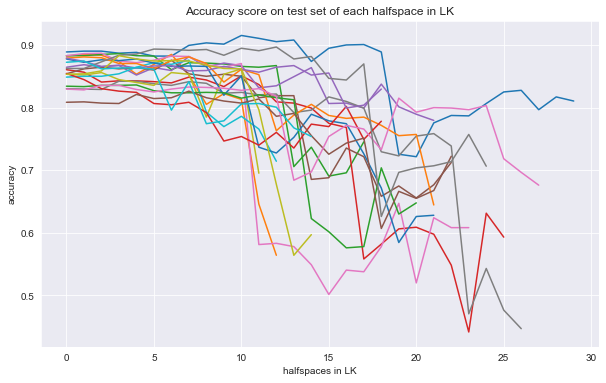

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
for l in per_w:
    plt.plot(range(len(l)),l)
plt.title("Accuracy score on test set of each halfspace in LK")
plt.ylabel('accuracy')
plt.xlabel('halfspaces in LK')
plt.show()

In [4]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla, fsla
from linear_models import *


for i in range(1):
    print('-- Split ', i, ' --')
    X, y = shuffle(X, y, random_state=2020)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    
    ## Halfspaces LK
    LK = Halfspaces(epochs=1, leakage=.2, frac=20)
    LK.fit(X_train, y_train)
LK.score(X_test, y_test), len(LK.models), LK.trace

(0.9196840026333114,
 32,
 [3082,
  2925,
  2813,
  2707,
  2401,
  2034,
  1541,
  1143,
  1066,
  752,
  630,
  621,
  542,
  319,
  290,
  283,
  274,
  254,
  227,
  221,
  182,
  166,
  161,
  141,
  132,
  125,
  114,
  110,
  100,
  92,
  72,
  45])

In [5]:
LK = Halfspaces(epochs=1, leakage=.2, frac=20)
LK.fit(X_train, y_train)
LK.score(X_test, y_test), len(LK.models), LK.trace

(0.9137590520079,
 27,
 [3082,
  2980,
  2874,
  2599,
  2338,
  1748,
  1137,
  950,
  553,
  488,
  477,
  472,
  405,
  393,
  344,
  278,
  260,
  184,
  182,
  181,
  171,
  169,
  153,
  151,
  149,
  126,
  115])

In [6]:
LK = Halfspaces(epochs=1, leakage=.2, frac=20, thresh='max')
LK.fit(X_train, y_train)
LK.score(X_test, y_test), len(LK.models), LK.trace

(0.9229756418696511,
 25,
 [3082,
  2942,
  2822,
  2562,
  2462,
  2442,
  1642,
  1282,
  1222,
  1202,
  1122,
  922,
  842,
  702,
  582,
  562,
  462,
  342,
  322,
  302,
  262,
  242,
  222,
  182,
  122])

In [8]:
LK = Halfspaces(epochs=1, leakage=.2, frac=20, thresh='max')
LK.fit(X_train, y_train)
LK.score(X_test, y_test), len(LK.models), LK.trace

(0.9229756418696511,
 25,
 [3082,
  2942,
  2822,
  2562,
  2462,
  2442,
  1642,
  1282,
  1222,
  1202,
  1122,
  922,
  842,
  702,
  582,
  562,
  462,
  342,
  322,
  302,
  262,
  242,
  222,
  182,
  122])

In [3]:
LK.T

[0.09491942,
 0.038347952,
 0.01414602,
 0.0058584874,
 0.0031437958,
 0.0023463732,
 0.0017934288,
 0.0008647897,
 0.00033047763,
 0.00049944513,
 0.00018191339,
 0.00042385355,
 0.00021767388,
 0.0001662951,
 0.000105783976,
 0.000141321,
 0.00038314916,
 6.7935405e-05,
 7.022597e-05,
 4.7456255e-05,
 6.524642e-07]

# Pretraitement
## Finding w* and outliers removal

In [4]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
print(len(y_train), len(y_test))
opt_clf = LinearSVC(random_state=2020)
opt_clf.fit(X_train, y_train)
print('SVM score: ', opt_clf.score(X_test, y_test))
print('initial size :', np.unique(y, return_counts=True), len(y))
gamma = .1
print(min(np.abs(opt_clf.decision_function(X))))
msq = np.abs(opt_clf.decision_function(X)) >= gamma
X, y = X[msq], y[msq]
print('removing samples with margin less than gamma = ', gamma, ' : ', np.unique(y, return_counts=True), len(y))

3082 1519
SVM score:  0.879526003949967
initial size : (array([0, 1]), array([2788, 1813])) 4601
0.0002239674546573589
removing samples with margin less than gamma =  0.1  :  (array([0, 1]), array([2729, 1475])) 4204


In [13]:
from sklearn.model_selection import train_test_split

gamma = 0.1
eps = .01
print('size of training set ', len(y_train), 'size of test set ', len(y_test))
print('sample complexity bound for epsilon = ', eps, ' : ', int(np.log(2/(gamma * eps)) * (2/(eps**2)))+1)
m = int(2*np.log(2/eps)/(gamma**2*eps**2))+1
print('sample complexity bound m for thresholding routine : ', m)

size of training set  3082 size of test set  1519
sample complexity bound for epsilon =  0.01  :  152019
sample complexity bound m for thresholding routine :  10596635


In [10]:
gamma = 0.0002239674546573589
eps = .01

print('sample complexity bound for epsilon = ', eps, ' : ', int(np.log(1/(gamma * eps)) * (1/(eps**2)))+1)
m = int(1/(gamma**2*eps**4))+1
print('sample complexity bound m for thresholding routine : ', m)

sample complexity bound for epsilon =  0.01  :  130092
sample complexity bound m for thresholding routine :  1993563948417073


## Massart noise model with random prior

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [15]:
from data_gen import *
from linear_models import *


err_opt = []
err_SVM = []
err_hlfs = []
noisy_y = Datasets.rand_Massart_noise(X, y, eta)
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, noisy_y, test_size=0.33, random_state=2020)
    ## w* misc error
    err_opt.append(1-opt_clf.score(X_test, y_test))
    
    ## SVM misc error
    clf = LinearSVC(random_state=2020)
    clf.fit(X_train, y_train)
    err_SVM.append(1-clf.score(X_test, y_test))
    
    ## Halfspaces model with max acc threshloding routine
    #hlfs = Halfspaces(leakage=eta+eps, frac=m, epochs = 1)
    #hlfs.fit(X_train, y_train)
    #err_hlfs.append(1-hlfs.score(X_test, y_test))

    
print('opt_clf: ', np.mean(err_opt), np.std(err_opt))
print('SVM: ', np.mean(err_SVM), np.std(err_SVM))
#print('half-spaces: ', np.mean(err_hlfs), np.std(err_hlfs))

opt_clf:  0.12740213523131674 2.7755575615628914e-17
SVM:  0.14234875444839856 0.0
